In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df1 = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)

In [4]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df1.replace({
  'France':0,
  'Germany':1,
  'Spain':2
}, inplace=True)

In [7]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df1.replace({
  'Male':1,
  'Female':0
}, inplace=True)

In [9]:
df1.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])

In [13]:
df2.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [16]:
df2.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
5,0.590,1,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1,0,0,1
6,0.944,1,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,1,0,0
7,0.052,0,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1,0,1,0
8,0.302,1,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0,1,0,0
9,0.668,1,0.121622,0.2,0.536488,0.000000,1,1,0.358605,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split

x = df2.drop(['Exited'], axis=1)
y = df2['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1)

In [18]:
xtrain.shape

(8000, 12)

In [21]:
model = keras.Sequential([
  keras.layers.Dense(12, input_shape=(12,), activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=1000)

Epoch 1/1000
250/250 [==============================] - 1s 1ms/step - loss: 0.5023 - accuracy: 0.7947
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7974
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.8008
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8040
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8025
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8081
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8104
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8145
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8173
Epoch 10/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.425

In [22]:
model.evaluate(xtest, ytest)

63/63 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8690


[0.32923802733421326, 0.8690000176429749]

In [23]:
ypred = []
yp = model.predict(xtest)

for element in yp:
  if element > 0.5:
    ypred.append(1)
  else:
    ypred.append(0)

63/63 [==============================] - 0s 1ms/step


In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.82      0.47      0.60       415

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

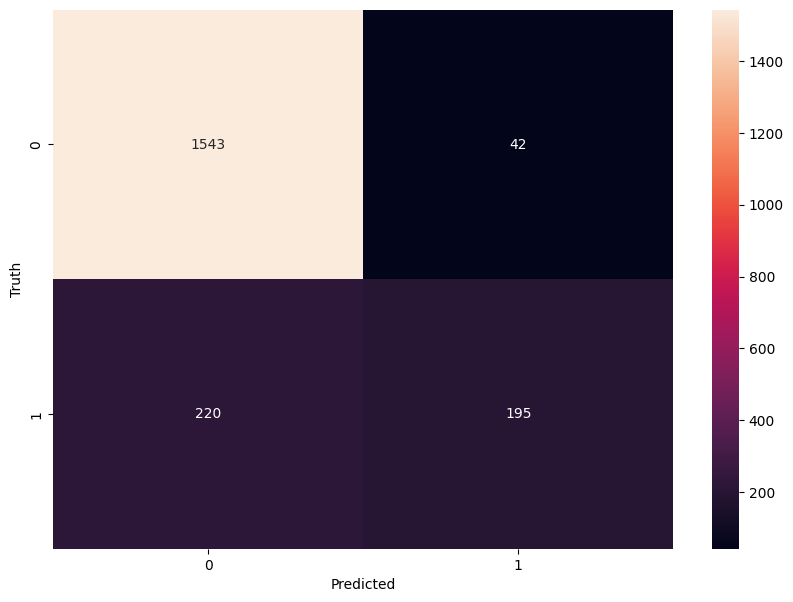

In [25]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')